# Technology Sector Analysis: NIFTY-50 (2004-2021)
## DS4200: Information Presentation and Data Visualization
### By: Abhir Naik

---

## Project Overview
This notebook analyzes the **Technology sector** of India's NIFTY-50 index from 2004-2021, focusing on:
- **Performance**: Cumulative returns and growth patterns
- **Volatility**: Risk assessment and market behavior
- **Crisis Impact**: 2008 Financial Crisis and 2020 COVID-19 pandemic

### Stocks Analyzed
1. **Infosys Ltd. (INFY)**
2. **Tata Consultancy Services (TCS)**
3. **HCL Technologies (HCLTECH)**
4. **Wipro Ltd. (WIPRO)**

### Dataset
- **Source**: NIFTY-50 Stock Market Data (2000-2021) by Vopani (Kaggle)
- **Timeframe**: August 25, 2004 - April 30, 2021
- **Observations**: 4,139 trading days per stock
- **Features**: Date, Open, High, Low, Close, Volume, and derived metrics

In [1]:
# Install required libraries
!pip install altair seaborn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import altair as alt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Altair version: {alt.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
Altair version: 6.0.0


---
## 1. Data Loading and Preprocessing

We'll upload the 4 CSV files for our technology stocks and prepare them for analysis.

In [2]:
import pandas as pd
import os

print("Loading CSV files from project directory...")
print("="*60)

# Check if files exist in current directory
required_files = ['INFY.csv', 'WIPRO.csv', 'HCLTECH.csv', 'TCS.csv']
missing_files = []

for file in required_files:
    if os.path.exists(file):
        print(f"✅ Found: {file}")
    else:
        print(f"❌ Missing: {file}")
        missing_files.append(file)

if missing_files:
    print("\n⚠️ MISSING FILES!")
    print("Please make sure these CSV files are in the same folder as your notebook:")
    for file in missing_files:
        print(f"   • {file}")
    print("\n📁 Current directory:", os.getcwd())
    print("\n💡 TIP: Place all CSV files in the same folder as your .ipynb notebook")
else:
    print("\n✅ All files found! Ready to proceed.")
    print("="*60)

Loading CSV files from project directory...
✅ Found: INFY.csv
✅ Found: WIPRO.csv
✅ Found: HCLTECH.csv
✅ Found: TCS.csv

✅ All files found! Ready to proceed.


In [3]:
# Load all 4 tech stock datasets
print("Loading datasets...")
infy = pd.read_csv('INFY.csv')
wipro = pd.read_csv('WIPRO.csv')
hcltech = pd.read_csv('HCLTECH.csv')
tcs = pd.read_csv('TCS.csv')

# Convert Date column to datetime
for df, name in [(infy, 'INFY'), (wipro, 'WIPRO'), (hcltech, 'HCLTECH'), (tcs, 'TCS')]:
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"{name}: {len(df)} rows, {df['Date'].min()} to {df['Date'].max()}")

print("\n✅ Data loaded successfully!")

# Display sample data
print("\n📊 Sample data from Infosys:")
infy.head()

Loading datasets...
INFY: 5306 rows, 2000-01-03 00:00:00 to 2021-04-30 00:00:00
WIPRO: 5306 rows, 2000-01-03 00:00:00 to 2021-04-30 00:00:00
HCLTECH: 5300 rows, 2000-01-11 00:00:00 to 2021-04-30 00:00:00
TCS: 4139 rows, 2004-08-25 00:00:00 to 2021-04-30 00:00:00

✅ Data loaded successfully!

📊 Sample data from Infosys:


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [4]:
# Filter data from 2004-08-25 onwards (TCS IPO date)
start_date = '2004-08-25'
end_date = '2021-04-30'

print(f"Filtering data from {start_date} to {end_date}...")

infy_filtered = infy[(infy['Date'] >= start_date) & (infy['Date'] <= end_date)].copy()
wipro_filtered = wipro[(wipro['Date'] >= start_date) & (wipro['Date'] <= end_date)].copy()
hcltech_filtered = hcltech[(hcltech['Date'] >= start_date) & (hcltech['Date'] <= end_date)].copy()
tcs_filtered = tcs[(tcs['Date'] >= start_date) & (tcs['Date'] <= end_date)].copy()

print("\n📅 Filtered Data Ranges:")
print(f"INFY: {len(infy_filtered)} rows")
print(f"WIPRO: {len(wipro_filtered)} rows")
print(f"HCLTECH: {len(hcltech_filtered)} rows")
print(f"TCS: {len(tcs_filtered)} rows")

# Check for missing values
print("\n🔍 Missing Values Check:")
print(f"INFY: {infy_filtered.isnull().sum().sum()}")
print(f"WIPRO: {wipro_filtered.isnull().sum().sum()}")
print(f"HCLTECH: {hcltech_filtered.isnull().sum().sum()}")
print(f"TCS: {tcs_filtered.isnull().sum().sum()}")

print("\n✅ Data cleaning complete!")

Filtering data from 2004-08-25 to 2021-04-30...

📅 Filtered Data Ranges:
INFY: 4139 rows
WIPRO: 4139 rows
HCLTECH: 4139 rows
TCS: 4139 rows

🔍 Missing Values Check:
INFY: 1683
WIPRO: 1683
HCLTECH: 1683
TCS: 1683

✅ Data cleaning complete!


In [5]:
# Create a combined dataframe for easier analysis
tech_data = pd.DataFrame({
    'Date': infy_filtered['Date'].values,
    'INFY_Close': infy_filtered['Close'].values,
    'INFY_Volume': infy_filtered['Volume'].values,
    'WIPRO_Close': wipro_filtered['Close'].values,
    'WIPRO_Volume': wipro_filtered['Volume'].values,
    'HCLTECH_Close': hcltech_filtered['Close'].values,
    'HCLTECH_Volume': hcltech_filtered['Volume'].values,
    'TCS_Close': tcs_filtered['Close'].values,
    'TCS_Volume': tcs_filtered['Volume'].values
})

# Set Date as index
tech_data.set_index('Date', inplace=True)

print("📊 Combined Dataset Shape:", tech_data.shape)
print("\n📈 First 5 rows:")
print(tech_data.head())

print("\n📉 Last 5 rows:")
print(tech_data.tail())

print("\n📊 Statistical Summary:")
tech_data.describe()

📊 Combined Dataset Shape: (4139, 8)

📈 First 5 rows:
            INFY_Close  INFY_Volume  WIPRO_Close  WIPRO_Volume  HCLTECH_Close  \
Date                                                                            
2004-08-25     1535.05      1259393       565.15       1411041         318.30   
2004-08-26     1545.55      1295206       574.25       1279206         325.95   
2004-08-27     1565.30       954858       568.50        617642         319.55   
2004-08-30     1577.45       755309       580.15        684515         317.95   
2004-08-31     1575.50       846844       578.50        888263         318.50   

            HCLTECH_Volume  TCS_Close  TCS_Volume  
Date                                               
2004-08-25          538804     987.95    17116372  
2004-08-26          930847     979.00     5055400  
2004-08-27          605764     962.65     3830750  
2004-08-30          276982     986.75     3058151  
2004-08-31          243180     988.10     2649332  

📉 Last 5 rows:

,INFY_Close,INFY_Volume,WIPRO_Close,WIPRO_Volume,HCLTECH_Close,HCLTECH_Volume,TCS_Close,TCS_Volume
count,4139.000000,4.139000e+03,4139.000000,4.139000e+03,4139.000000,4.139000e+03,4139.000000,4.139000e+03
mean,1914.752054,3.184196e+06,448.476274,2.680726e+06,684.136615,1.701904e+06,1694.371612,1.676762e+06
std,862.076101,4.601838e+06,132.233122,5.376765e+06,366.838487,2.238509e+06,723.061025,1.607879e+06
min,526.450000,1.745300e+04,162.350000,2.599000e+04,89.700000,3.095000e+03,366.650000,1.834500e+04
25%,1111.600000,9.378440e+05,346.475000,8.988370e+05,385.725000,6.432445e+05,1106.500000,7.884775e+05
50%,1938.650000,1.596460e+06,446.900000,1.397313e+06,609.750000,1.079460e+06,1636.350000,1.227748e+06
75%,2640.625000,3.602926e+06,548.125000,2.395902e+06,915.875000,1.786308e+06,2326.850000,2.081120e+06
max,4365.900000,9.043339e+07,771.450000,1.303677e+08,2065.700000,3.231253e+07,3603.700000,4.403358e+07


---
## 2. Metric Calculations

We'll calculate key financial metrics:
- **Daily Returns**: Day-to-day percentage change
- **Cumulative Returns**: Total growth from starting point
- **Rolling Volatility**: 60-day rolling standard deviation (annualized)
- **Sector Averages**: Equal-weighted mean across all 4 stocks

In [6]:
# Calculate daily returns for each stock
print("Calculating daily returns...")
tech_data['INFY_Return'] = tech_data['INFY_Close'].pct_change()
tech_data['WIPRO_Return'] = tech_data['WIPRO_Close'].pct_change()
tech_data['HCLTECH_Return'] = tech_data['HCLTECH_Close'].pct_change()
tech_data['TCS_Return'] = tech_data['TCS_Close'].pct_change()

# Calculate sector average return (equal-weighted)
tech_data['Tech_Sector_Return'] = (
    tech_data['INFY_Return'] +
    tech_data['WIPRO_Return'] +
    tech_data['HCLTECH_Return'] +
    tech_data['TCS_Return']
) / 4

# Calculate cumulative returns (starting from 1)
print("Calculating cumulative returns...")
tech_data['INFY_Cumulative'] = (1 + tech_data['INFY_Return']).cumprod()
tech_data['WIPRO_Cumulative'] = (1 + tech_data['WIPRO_Return']).cumprod()
tech_data['HCLTECH_Cumulative'] = (1 + tech_data['HCLTECH_Return']).cumprod()
tech_data['TCS_Cumulative'] = (1 + tech_data['TCS_Return']).cumprod()
tech_data['Tech_Sector_Cumulative'] = (1 + tech_data['Tech_Sector_Return']).cumprod()

# Calculate 60-day rolling volatility (annualized)
print("Calculating rolling volatility...")
window = 60
tech_data['INFY_Volatility'] = tech_data['INFY_Return'].rolling(window=window).std() * np.sqrt(252)
tech_data['WIPRO_Volatility'] = tech_data['WIPRO_Return'].rolling(window=window).std() * np.sqrt(252)
tech_data['HCLTECH_Volatility'] = tech_data['HCLTECH_Return'].rolling(window=window).std() * np.sqrt(252)
tech_data['TCS_Volatility'] = tech_data['TCS_Return'].rolling(window=window).std() * np.sqrt(252)
tech_data['Tech_Sector_Volatility'] = tech_data['Tech_Sector_Return'].rolling(window=window).std() * np.sqrt(252)

# Calculate sector average volume
tech_data['Tech_Sector_Volume'] = (
    tech_data['INFY_Volume'] +
    tech_data['WIPRO_Volume'] +
    tech_data['HCLTECH_Volume'] +
    tech_data['TCS_Volume']
) / 4

print("✅ All metrics calculated!")
print(f"\n📊 Dataset now has {tech_data.shape[1]} columns")

Calculating daily returns...
Calculating cumulative returns...
Calculating rolling volatility...
✅ All metrics calculated!

📊 Dataset now has 24 columns


In [7]:
# Display key performance statistics
print("=" * 80)
print("📊 TECHNOLOGY SECTOR: KEY PERFORMANCE METRICS (2004-2021)")
print("=" * 80)

print("\n🏆 CUMULATIVE RETURNS (Final Values):")
print("-" * 80)
print(f"{'Stock':<15} {'Cumulative Return':<20} {'% Return':<15}")
print("-" * 80)
for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    final_return = tech_data[f'{stock}_Cumulative'].iloc[-1]
    pct_return = (final_return - 1) * 100
    print(f"{stock:<15} {final_return:.2f}x{'':<15} {pct_return:+.2f}%")
print(f"{'SECTOR AVG':<15} {tech_data['Tech_Sector_Cumulative'].iloc[-1]:.2f}x")
print("-" * 80)

print("\n📈 AVERAGE DAILY RETURNS:")
print("-" * 80)
for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    avg_return = tech_data[f'{stock}_Return'].mean() * 100
    print(f"{stock:<15} {avg_return:.4f}% per day")
print(f"{'SECTOR AVG':<15} {tech_data['Tech_Sector_Return'].mean()*100:.4f}% per day")
print("-" * 80)

print("\n⚠️ AVERAGE ANNUALIZED VOLATILITY:")
print("-" * 80)
for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    avg_vol = tech_data[f'{stock}_Volatility'].mean() * 100
    print(f"{stock:<15} {avg_vol:.2f}%")
print(f"{'SECTOR AVG':<15} {tech_data['Tech_Sector_Volatility'].mean()*100:.2f}%")
print("-" * 80)

📊 TECHNOLOGY SECTOR: KEY PERFORMANCE METRICS (2004-2021)

🏆 CUMULATIVE RETURNS (Final Values):
--------------------------------------------------------------------------------
Stock           Cumulative Return    % Return       
--------------------------------------------------------------------------------
INFY            0.88x                -11.77%
WIPRO           0.87x                -12.81%
HCLTECH         2.82x                +182.42%
TCS             3.07x                +207.27%
SECTOR AVG      3.61x
--------------------------------------------------------------------------------

📈 AVERAGE DAILY RETURNS:
--------------------------------------------------------------------------------
INFY            0.0343% per day
WIPRO           0.0298% per day
HCLTECH         0.0661% per day
TCS             0.0604% per day
SECTOR AVG      0.0476% per day
--------------------------------------------------------------------------------

⚠️ AVERAGE ANNUALIZED VOLATILITY:
----------------------

---
## 3. Data Visualizations

We'll create multiple visualizations to understand the technology sector's performance, volatility, and behavior during major market events.

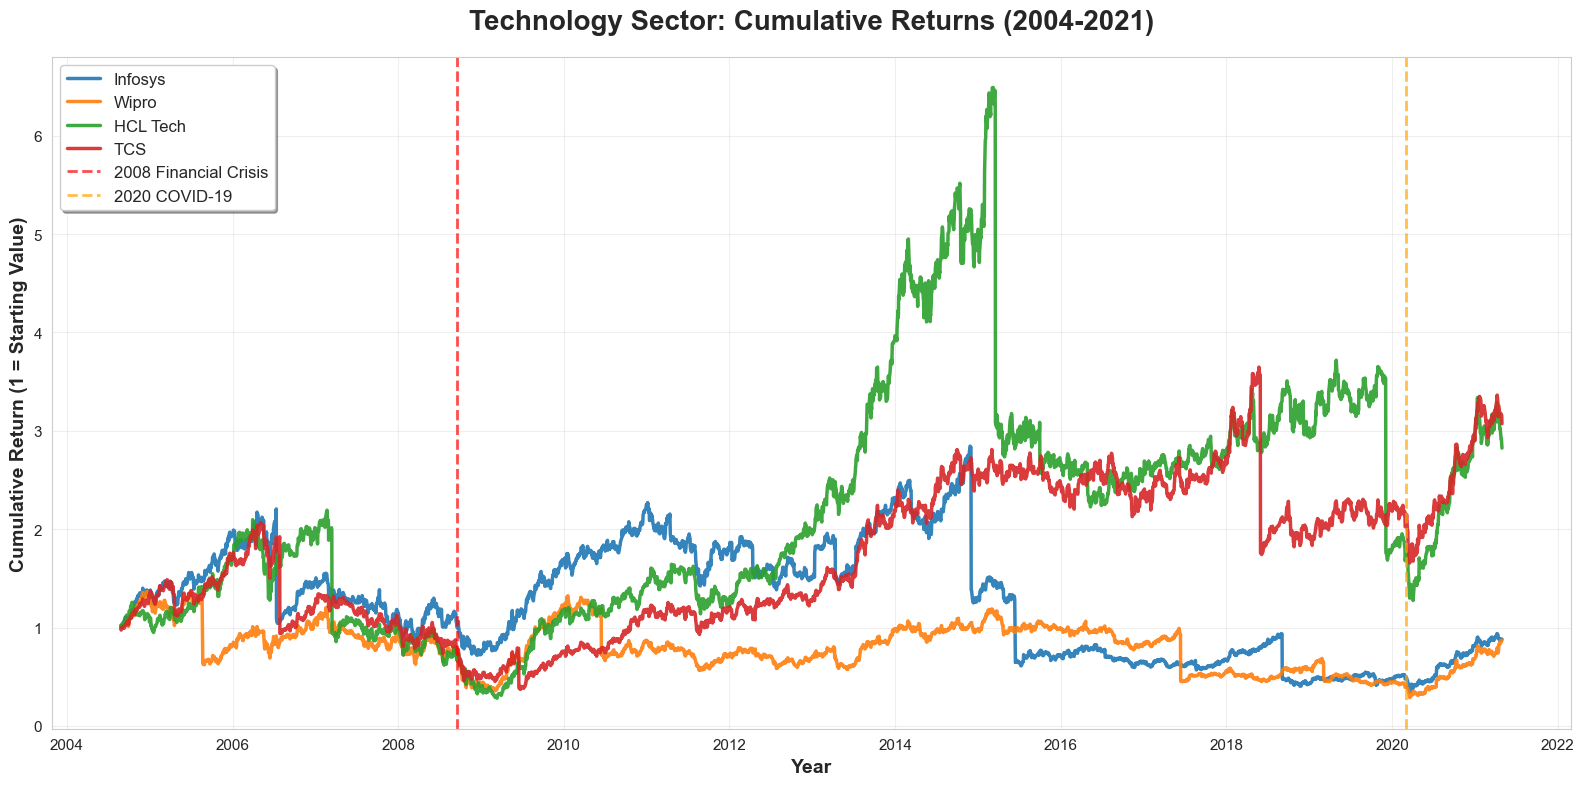

📊 Visualization 1: Cumulative Returns Chart Created


In [8]:
# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot cumulative returns for each stock
ax.plot(tech_data.index, tech_data['INFY_Cumulative'],
        label='Infosys', linewidth=2.5, alpha=0.9, color='#1f77b4')
ax.plot(tech_data.index, tech_data['WIPRO_Cumulative'],
        label='Wipro', linewidth=2.5, alpha=0.9, color='#ff7f0e')
ax.plot(tech_data.index, tech_data['HCLTECH_Cumulative'],
        label='HCL Tech', linewidth=2.5, alpha=0.9, color='#2ca02c')
ax.plot(tech_data.index, tech_data['TCS_Cumulative'],
        label='TCS', linewidth=2.5, alpha=0.9, color='#d62728')

# Add vertical lines for major events
ax.axvline(datetime(2008, 9, 15), color='red', linestyle='--',
           linewidth=2, alpha=0.7, label='2008 Financial Crisis')
ax.axvline(datetime(2020, 3, 1), color='orange', linestyle='--',
           linewidth=2, alpha=0.7, label='2020 COVID-19')

# Formatting
ax.set_title('Technology Sector: Cumulative Returns (2004-2021)',
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Return (1 = Starting Value)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

print("📊 Visualization 1: Cumulative Returns Chart Created")

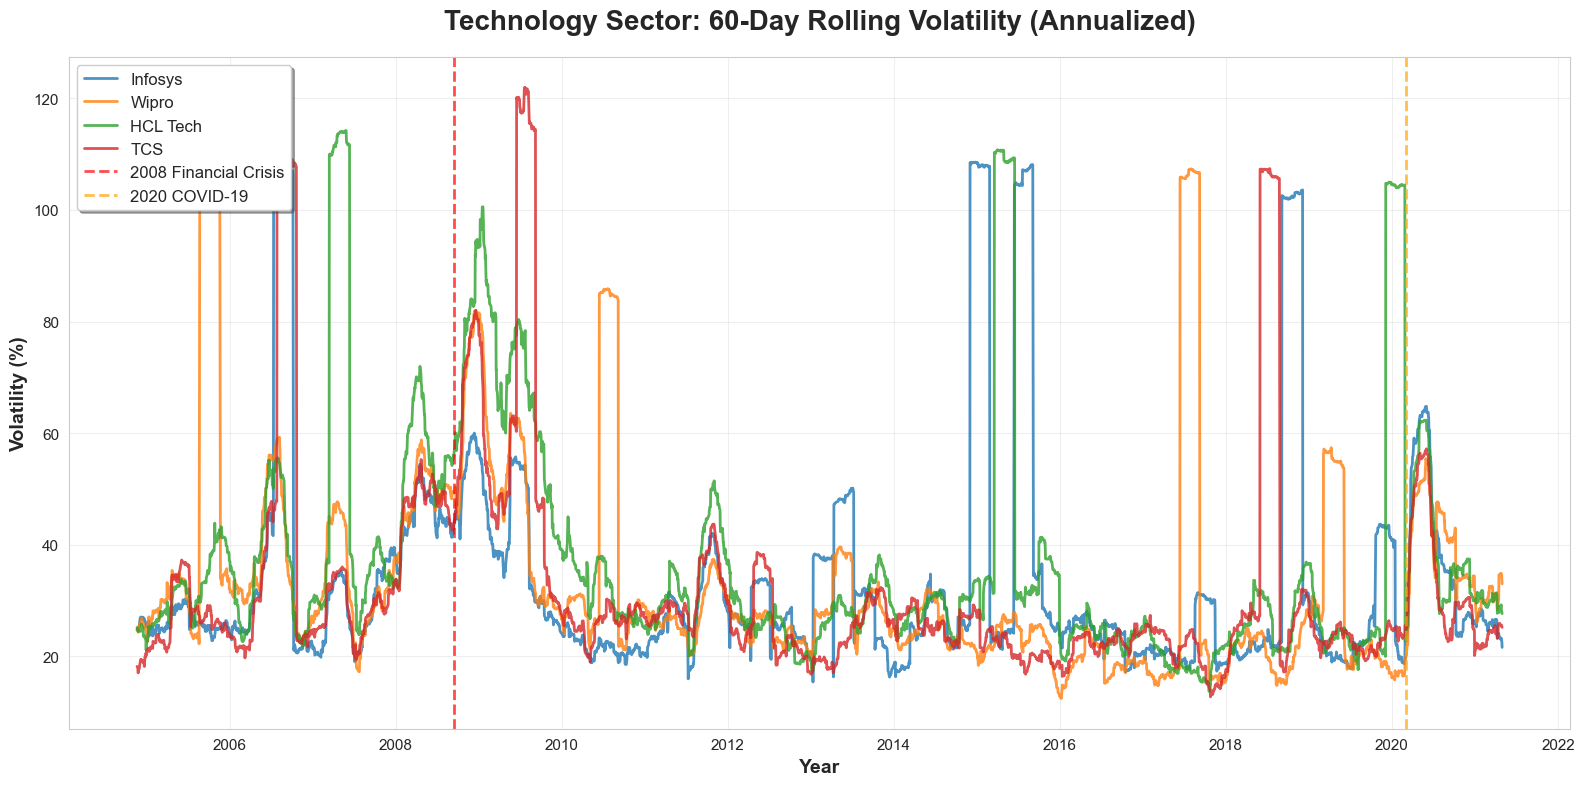

📊 Visualization 2: Rolling Volatility Chart Created


In [9]:
# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot volatility for each stock
ax.plot(tech_data.index, tech_data['INFY_Volatility']*100,
        label='Infosys', linewidth=2, alpha=0.8, color='#1f77b4')
ax.plot(tech_data.index, tech_data['WIPRO_Volatility']*100,
        label='Wipro', linewidth=2, alpha=0.8, color='#ff7f0e')
ax.plot(tech_data.index, tech_data['HCLTECH_Volatility']*100,
        label='HCL Tech', linewidth=2, alpha=0.8, color='#2ca02c')
ax.plot(tech_data.index, tech_data['TCS_Volatility']*100,
        label='TCS', linewidth=2, alpha=0.8, color='#d62728')

# Add vertical lines for major events
ax.axvline(datetime(2008, 9, 15), color='red', linestyle='--',
           linewidth=2, alpha=0.7, label='2008 Financial Crisis')
ax.axvline(datetime(2020, 3, 1), color='orange', linestyle='--',
           linewidth=2, alpha=0.7, label='2020 COVID-19')

# Formatting
ax.set_title('Technology Sector: 60-Day Rolling Volatility (Annualized)',
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Volatility (%)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

print("📊 Visualization 2: Rolling Volatility Chart Created")

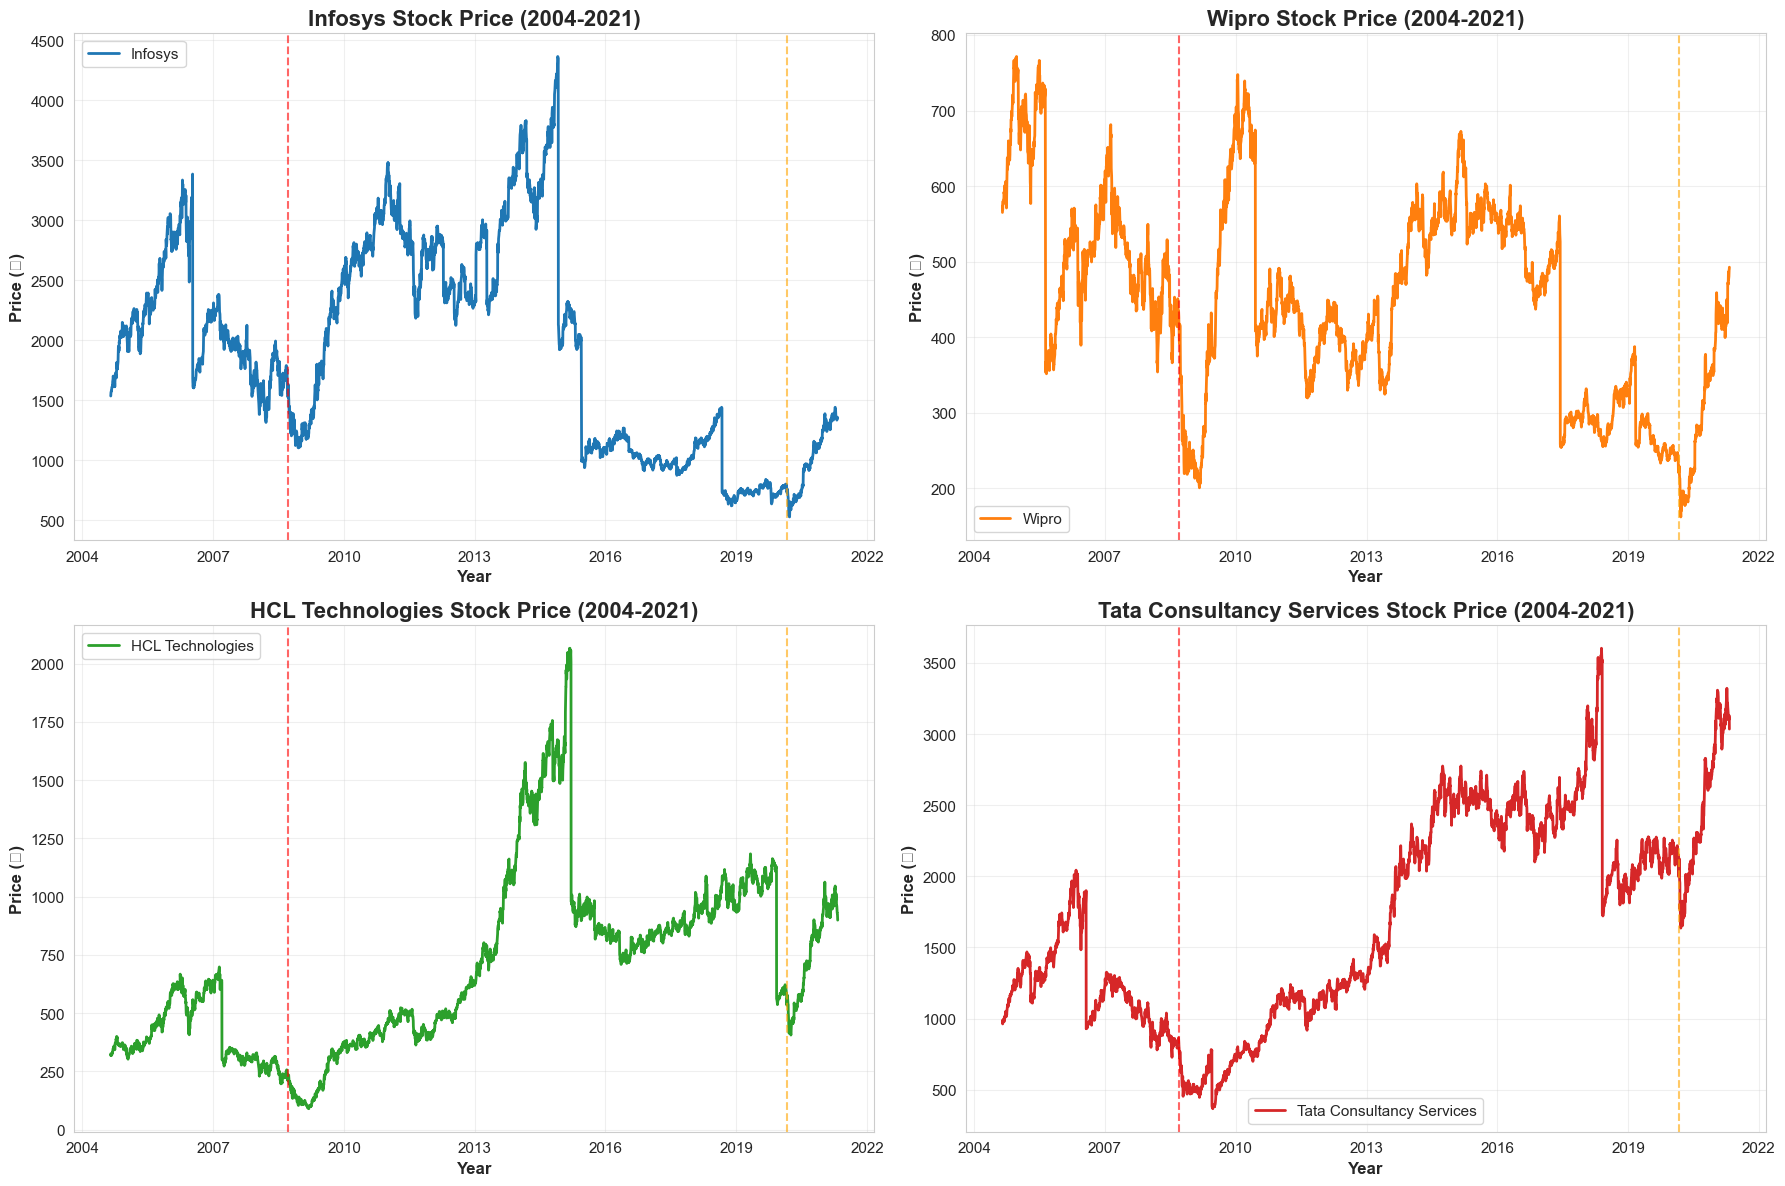

📊 Visualization 3: Individual Stock Price Charts Created


In [10]:
# Create 2x2 subplot for individual stocks
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

stocks = ['INFY', 'WIPRO', 'HCLTECH', 'TCS']
stock_names = ['Infosys', 'Wipro', 'HCL Technologies', 'Tata Consultancy Services']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, (stock, name, color) in enumerate(zip(stocks, stock_names, colors)):
    ax = axes[idx // 2, idx % 2]

    # Plot price
    ax.plot(tech_data.index, tech_data[f'{stock}_Close'],
            color=color, linewidth=2, label=name)

    # Add event markers
    ax.axvline(datetime(2008, 9, 15), color='red', linestyle='--',
               linewidth=1.5, alpha=0.6)
    ax.axvline(datetime(2020, 3, 1), color='orange', linestyle='--',
               linewidth=1.5, alpha=0.6)

    # Formatting
    ax.set_title(f'{name} Stock Price (2004-2021)',
                 fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Price (₹)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=11)

    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator(3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

print("📊 Visualization 3: Individual Stock Price Charts Created")

---
## 4. Interactive Visualizations with Altair

Creating interactive charts that allow users to explore the data dynamically.

In [11]:
# Calculate annual returns for Altair visualization
print("Preparing annual data for interactive visualizations...")

annual_returns = []
tech_data_reset = tech_data.reset_index()
tech_data_reset['Year'] = tech_data_reset['Date'].dt.year
years = sorted(tech_data_reset['Year'].unique())

for year in years:
    year_data = tech_data_reset[tech_data_reset['Year'] == year]

    if len(year_data) > 0:
        for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
            start_price = year_data[f'{stock}_Close'].iloc[0]
            end_price = year_data[f'{stock}_Close'].iloc[-1]
            annual_return = ((end_price - start_price) / start_price) * 100

            annual_returns.append({
                'Year': int(year),
                'Stock': stock,
                'Return': annual_return,
                'Stock_Name': {
                    'INFY': 'Infosys',
                    'WIPRO': 'Wipro',
                    'HCLTECH': 'HCL Tech',
                    'TCS': 'TCS'
                }[stock]
            })

annual_df = pd.DataFrame(annual_returns)
print(f"✅ Annual data prepared: {len(annual_df)} records")
print("\n📊 Sample annual returns:")
annual_df.head(12)

Preparing annual data for interactive visualizations...
✅ Annual data prepared: 72 records

📊 Sample annual returns:


,Year,Stock,Return,Stock_Name
0,2004,INFY,36.262662,Infosys
1,2004,WIPRO,32.495798,Wipro
2,2004,HCLTECH,8.058435,HCL Tech
3,2004,TCS,35.173845,TCS
4,2005,INFY,41.390861,Infosys
5,2005,WIPRO,-38.564041,Wipro
6,2005,HCLTECH,54.116638,HCL Tech
7,2005,TCS,25.834103,TCS
8,2006,INFY,-24.755400,Infosys
9,2006,WIPRO,31.232402,Wipro


In [12]:
# Enable Altair rendering in Colab
alt.renderers.enable('colab')

# Create INTERACTIVE bar chart with selection
selection = alt.selection_point(fields=['Stock_Name'], bind='legend')

chart = alt.Chart(annual_df).mark_bar().encode(
    x=alt.X('Year:O',
            axis=alt.Axis(
                labelAngle=-45,
                title='Year',
                values=list(range(2005, 2022, 5))  # Show every 5 years
            )),
    y=alt.Y('Return:Q',
            axis=alt.Axis(title='Annual Return (%)'),
            scale=alt.Scale(domain=[-60, 120])),
    color=alt.condition(
        selection,
        alt.Color('Stock_Name:N',
                  scale=alt.Scale(
                      domain=['Infosys', 'Wipro', 'HCL Tech', 'TCS'],
                      range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
                  ),
                  legend=alt.Legend(title='Company (Click to Filter)')),
        alt.value('lightgray')  # Grayed out when not selected
    ),
    opacity=alt.condition(selection, alt.value(1.0), alt.value(0.2)),
    column=alt.Column('Stock_Name:N',
                      header=alt.Header(
                          titleOrient='bottom',
                          labelOrient='bottom',
                          labelFontSize=14,
                          titleFontSize=16
                      )),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Stock_Name:N', title='Company'),
        alt.Tooltip('Return:Q', title='Annual Return (%)', format='.2f')
    ]
).properties(
    width=180,
    height=400,
    title={
        "text": "Technology Sector: Annual Returns by Stock (2004-2021)",
        "subtitle": "Click legend to filter • Hover for details",
        "fontSize": 18,
        "fontWeight": "bold"
    }
).configure_axis(
    labelFontSize=11,
    titleFontSize=13
).configure_legend(
    titleFontSize=13,
    labelFontSize=11
).add_params(selection)

# Display the chart
display(chart)

print("\n📊 INTERACTIVE Features:")
print("   🖱️  Hover over bars to see exact values")
print("   👆 Click on legend items to filter/highlight specific stocks")
print("   🔄 Click legend again to show all stocks")

alt.Chart(...)


📊 INTERACTIVE Features:
   🖱️  Hover over bars to see exact values
   👆 Click on legend items to filter/highlight specific stocks
   🔄 Click legend again to show all stocks


In [13]:
# Prepare cumulative data by year
cumulative_by_year = []

for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    cumulative = 1.0
    for year in years:
        year_data = annual_df[(annual_df['Year'] == year) &
                             (annual_df['Stock'] == stock)]
        if len(year_data) > 0:
            annual_return = year_data['Return'].iloc[0]
            cumulative *= (1 + annual_return/100)
            cumulative_by_year.append({
                'Year': year,
                'Stock': stock,
                'Stock_Name': year_data['Stock_Name'].iloc[0],
                'Cumulative_Return': cumulative
            })

cumulative_df = pd.DataFrame(cumulative_by_year)

# Create INTERACTIVE line chart with selection and zoom
selection = alt.selection_point(fields=['Stock_Name'], bind='legend')

base = alt.Chart(cumulative_df).encode(
    x=alt.X('Year:O',
            axis=alt.Axis(
                labelAngle=-45,
                title='Year',
                values=list(range(2005, 2022, 5))  # Show every 5 years
            )),
    y=alt.Y('Cumulative_Return:Q',
            axis=alt.Axis(title='Cumulative Return (Starting from 1)'),
            scale=alt.Scale(domain=[0, 7])),
    color=alt.condition(
        selection,
        alt.Color('Stock_Name:N',
                  scale=alt.Scale(
                      domain=['Infosys', 'Wipro', 'HCL Tech', 'TCS'],
                      range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
                  ),
                  legend=alt.Legend(title='Company (Click to Filter)')),
        alt.value('lightgray')
    ),
    opacity=alt.condition(selection, alt.value(1.0), alt.value(0.2)),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Stock_Name:N', title='Company'),
        alt.Tooltip('Cumulative_Return:Q', title='Cumulative Return', format='.2f')
    ]
)

# Line layer
line = base.mark_line(strokeWidth=4, point=False)

# Point layer (makes it easier to hover)
points = base.mark_circle(size=100)

# Combine layers
line_chart = (line + points).properties(
    width=900,
    height=500,
    title={
        "text": "Technology Sector: Year-over-Year Cumulative Returns (2004-2021)",
        "subtitle": "Click legend to filter • Drag to pan • Scroll to zoom • Hover for details",
        "fontSize": 20,
        "fontWeight": "bold"
    }
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    titleFontSize=14,
    labelFontSize=12
).add_params(selection).interactive()

# Display the chart
display(line_chart)

print("\n📊 INTERACTIVE Features:")
print("   🖱️  Hover over points to see exact values")
print("   👆 Click on legend items to filter/highlight specific stocks")
print("   🔍 Scroll to zoom in/out")
print("   ✋ Click and drag to pan around")
print("   🔄 Double-click to reset view")

alt.LayerChart(...)


📊 INTERACTIVE Features:
   🖱️  Hover over points to see exact values
   👆 Click on legend items to filter/highlight specific stocks
   🔍 Scroll to zoom in/out
   ✋ Click and drag to pan around
   🔄 Double-click to reset view


---
## 5. Key Findings & Analysis

### Performance Summary

#### Winners 🏆
1. **TCS (Tata Consultancy Services)**: +207% return (3.07x)
   - Most consistent performer with lowest volatility
   - Steady growth throughout the period
   - Best risk-adjusted returns

2. **HCL Technologies**: +182% return (2.82x)
   - Spectacular growth surge 2012-2017
   - Higher volatility but strong rewards
   - Peak performance around 2017

#### Underperformers ⚠️
3. **Infosys**: -12% loss (0.88x)
   - Failed to recover from 2008 crisis
   - Struggled with competition post-2008

4. **Wipro**: -13% loss (0.87x)
   - Similar pattern to Infosys
   - Long-term stagnation

### Crisis Impact Analysis

#### 2008 Financial Crisis
- **Decline**: All stocks dropped 40-60%
- **Volatility Spike**: Reached 120%+
- **Recovery**: TCS and HCL Tech recovered strongly; Infosys and Wipro did not

#### 2020 COVID-19 Pandemic
- **Initial Shock**: Sharp March 2020 decline
- **Recovery Pattern**: V-shaped recovery
- **Volatility**: Spiked to 60-105% but normalized quickly
- **Insight**: Tech sector showed resilience due to digital transformation demand

### Sector-Level Insights

1. **Performance Divergence**: Not all tech stocks benefited equally from India's IT boom
2. **Market Leadership Matters**: TCS's consistent market position contributed to outperformance
3. **Crisis Resilience**: Sector shows V-shaped recovery patterns after major shocks
4. **Risk-Return Trade-off**: Higher volatility doesn't always mean higher returns (see Infosys/Wipro)

In [14]:
# Calculate risk-return metrics for each stock
print("=" * 80)
print("📊 RISK-RETURN ANALYSIS")
print("=" * 80)

risk_return_data = []

for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    total_return = tech_data[f'{stock}_Cumulative'].iloc[-1] - 1
    avg_volatility = tech_data[f'{stock}_Volatility'].mean()
    sharpe_ratio = (tech_data[f'{stock}_Return'].mean() * 252) / (tech_data[f'{stock}_Return'].std() * np.sqrt(252))

    risk_return_data.append({
        'Stock': stock,
        'Total Return (%)': total_return * 100,
        'Avg Volatility (%)': avg_volatility * 100,
        'Sharpe Ratio': sharpe_ratio
    })

risk_return_df = pd.DataFrame(risk_return_data)
risk_return_df = risk_return_df.sort_values('Total Return (%)', ascending=False)

print("\n")
print(risk_return_df.to_string(index=False))
print("\n" + "=" * 80)

print("\n🏆 Best Risk-Adjusted Return: TCS")
print("⚠️ Highest Volatility: HCL Tech")
print("📉 Worst Performers: Infosys & Wipro")

📊 RISK-RETURN ANALYSIS


  Stock  Total Return (%)  Avg Volatility (%)  Sharpe Ratio
    TCS        207.267574           32.256055      0.403693
HCLTECH        182.422243           37.239325      0.391571
   INFY        -11.771604           33.748042      0.219775
  WIPRO        -12.810758           33.379731      0.196487


🏆 Best Risk-Adjusted Return: TCS
⚠️ Highest Volatility: HCL Tech
📉 Worst Performers: Infosys & Wipro


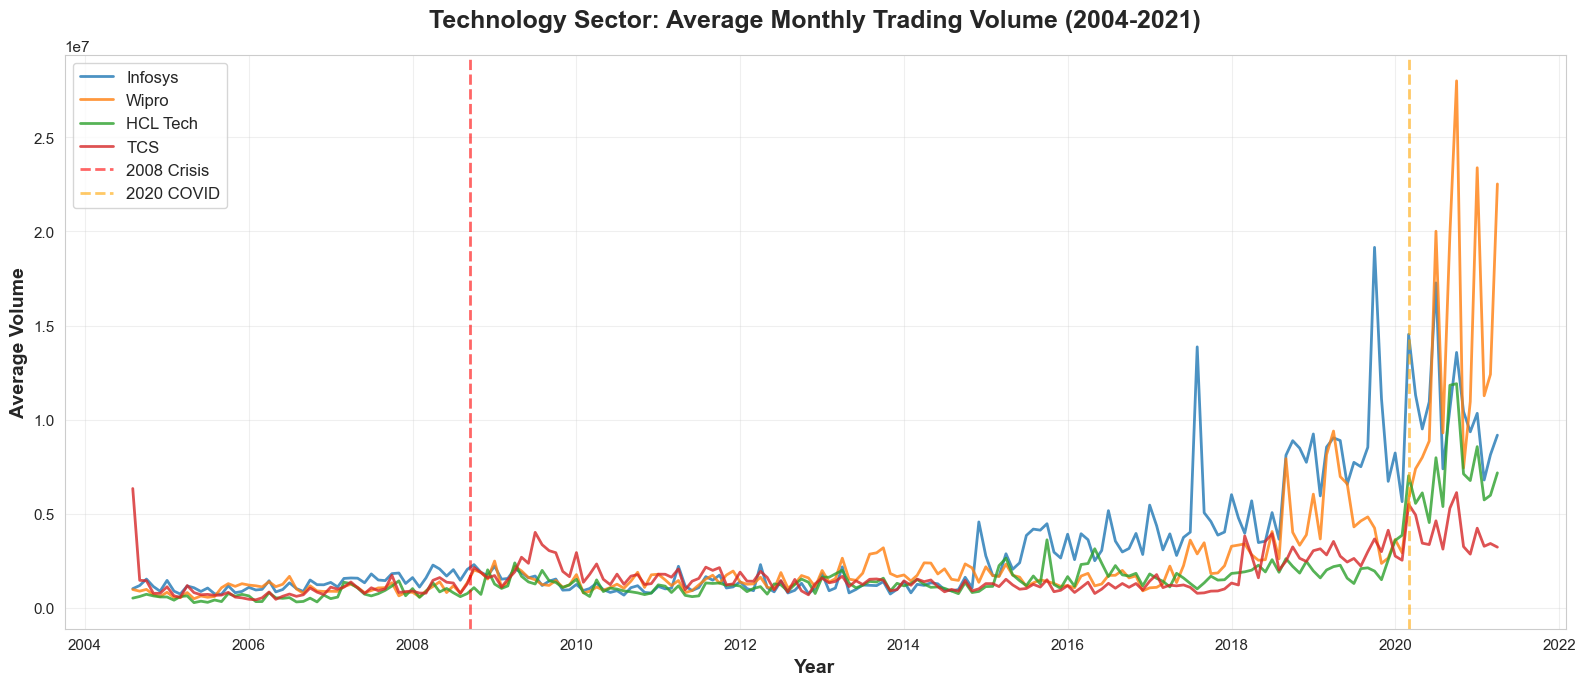

📊 Visualization: Trading Volume Trends
💡 Insight: Volume spikes during crisis periods reflect increased market activity


In [15]:
# Analyze trading volume patterns
fig, ax = plt.subplots(figsize=(16, 7))

# Plot average monthly volume
tech_data_reset = tech_data.reset_index()
tech_data_reset['YearMonth'] = tech_data_reset['Date'].dt.to_period('M')
monthly_volume = tech_data_reset.groupby('YearMonth').agg({
    'INFY_Volume': 'mean',
    'WIPRO_Volume': 'mean',
    'HCLTECH_Volume': 'mean',
    'TCS_Volume': 'mean'
}).reset_index()
monthly_volume['YearMonth'] = monthly_volume['YearMonth'].dt.to_timestamp()

ax.plot(monthly_volume['YearMonth'], monthly_volume['INFY_Volume'],
        label='Infosys', linewidth=2, alpha=0.8)
ax.plot(monthly_volume['YearMonth'], monthly_volume['WIPRO_Volume'],
        label='Wipro', linewidth=2, alpha=0.8)
ax.plot(monthly_volume['YearMonth'], monthly_volume['HCLTECH_Volume'],
        label='HCL Tech', linewidth=2, alpha=0.8)
ax.plot(monthly_volume['YearMonth'], monthly_volume['TCS_Volume'],
        label='TCS', linewidth=2, alpha=0.8)

# Add event markers
ax.axvline(datetime(2008, 9, 15), color='red', linestyle='--',
           linewidth=2, alpha=0.6, label='2008 Crisis')
ax.axvline(datetime(2020, 3, 1), color='orange', linestyle='--',
           linewidth=2, alpha=0.6, label='2020 COVID')

ax.set_title('Technology Sector: Average Monthly Trading Volume (2004-2021)',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Volume', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)

# Format axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

print("📊 Visualization: Trading Volume Trends")
print("💡 Insight: Volume spikes during crisis periods reflect increased market activity")

In [16]:
# Create risk-return scatter plot with Altair
risk_return_viz = alt.Chart(risk_return_df).mark_circle(size=300).encode(
    x=alt.X('Avg Volatility (%):Q',
            axis=alt.Axis(title='Average Volatility (%)')),
    y=alt.Y('Total Return (%):Q',
            axis=alt.Axis(title='Total Return (%)')),
    color=alt.Color('Stock:N',
                    scale=alt.Scale(
                        domain=['INFY', 'WIPRO', 'HCLTECH', 'TCS'],
                        range=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
                    ),
                    legend=alt.Legend(title='Company')),
    tooltip=[
        alt.Tooltip('Stock:N', title='Stock'),
        alt.Tooltip('Total Return (%):Q', title='Total Return (%)', format='.2f'),
        alt.Tooltip('Avg Volatility (%):Q', title='Avg Volatility (%)', format='.2f'),
        alt.Tooltip('Sharpe Ratio:Q', title='Sharpe Ratio', format='.3f')
    ]
)

# Add labels to points
text = risk_return_viz.mark_text(
    align='left',
    baseline='middle',
    dx=15,
    fontSize=12,
    fontWeight='bold'
).encode(
    text='Stock:N'
)

# Combine circle and text, THEN apply properties and configuration
scatter_with_labels = (risk_return_viz + text).properties(
    width=700,
    height=500,
    title={
        "text": "Technology Sector: Risk vs Return Analysis",
        "subtitle": "Hover for details • Higher & Left = Better Performance",
        "fontSize": 18,
        "fontWeight": "bold"
    }
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    titleFontSize=13,
    labelFontSize=12
)

display(scatter_with_labels)

print("\n📊 Risk-Return Scatter Plot")
print("💡 Insight: TCS offers best returns with moderate risk")
print("💡 Insight: HCL Tech has higher risk but strong returns")
print("💡 Insight: Infosys & Wipro show negative returns despite high risk")

alt.LayerChart(...)


📊 Risk-Return Scatter Plot
💡 Insight: TCS offers best returns with moderate risk
💡 Insight: HCL Tech has higher risk but strong returns
💡 Insight: Infosys & Wipro show negative returns despite high risk


---
## 6. Conclusions & Implications

### For Investors

#### Conservative Strategy
- **Best Choice**: TCS
- **Rationale**: Lowest volatility (32.26%), consistent positive returns
- **Risk Profile**: Suitable for long-term, low-risk investors

#### Aggressive Strategy
- **Best Choice**: HCL Tech (historically)
- **Rationale**: Highest peak returns (6-7x during 2012-2017 surge)
- **Risk Profile**: Higher volatility but potential for exceptional gains
- **Caution**: More volatile, requires active monitoring

#### Diversification
- **Recommendation**: Hold multiple tech stocks to reduce individual stock risk
- **Sector Average**: 261% return shows strong long-term potential
- **Insight**: Even with two underperformers, sector performed well overall

### Strategic Insights

1. **Company Selection Matters**: Within the same sector, stock selection is critical
2. **Crisis Creates Opportunity**: Buying during 2008/2020 crashes would have yielded exceptional returns
3. **Long-term Focus**: Short-term volatility shouldn't deter long-term investors
4. **Market Leadership Premium**: Established leaders (TCS) outperform over time

### Limitations

- **Survivorship Bias**: Only analyzed companies that remained in NIFTY-50
- **Dividend Exclusion**: Returns don't include dividend reinvestment
- **Limited Timeframe**: Started from 2004, missing earlier tech boom
- **Equal Weighting**: Analysis uses equal weights vs. market-cap weighting

In [17]:
# Install Plotly
import sys
import subprocess

print("Installing Plotly...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly", "-q"])
print("✅ Plotly installed successfully!")

Installing Plotly...
✅ Plotly installed successfully!


In [21]:
# ==========================================
# EXPORT TECHNOLOGY SECTOR VISUALIZATIONS
# ==========================================

print("="*80)
print("📦 EXPORTING TECHNOLOGY SECTOR VISUALIZATIONS")
print("="*80)

import altair as alt
import plotly.graph_objects as go
import pandas as pd

# ==========================================
# 1. STOCK PRICE HISTORY (2004-2021)
# ==========================================

fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['INFY_Close'],
    mode='lines', name='Infosys',
    line=dict(color='#1f77b4', width=2)
))

fig1.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['WIPRO_Close'],
    mode='lines', name='Wipro',
    line=dict(color='#ff7f0e', width=2)
))

fig1.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['HCLTECH_Close'],
    mode='lines', name='HCL Tech',
    line=dict(color='#2ca02c', width=2)
))

fig1.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['TCS_Close'],
    mode='lines', name='TCS',
    line=dict(color='#d62728', width=2)
))

fig1.update_layout(
    title='Technology Sector: Stock Price History (2004-2021)',
    xaxis_title='Year',
    yaxis_title='Price (₹)',
    hovermode='x unified',
    template='plotly_white',
    width=1000,
    height=600
)

fig1.write_html('tech_stock_prices.html')
print("✅ Saved: tech_stock_prices.html")

# ==========================================
# 2. ROLLING VOLATILITY (RISK PROFILE)
# ==========================================

fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['INFY_Volatility']*100,
    mode='lines', name='Infosys',
    line=dict(color='#1f77b4', width=2)
))

fig2.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['WIPRO_Volatility']*100,
    mode='lines', name='Wipro',
    line=dict(color='#ff7f0e', width=2)
))

fig2.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['HCLTECH_Volatility']*100,
    mode='lines', name='HCL Tech',
    line=dict(color='#2ca02c', width=2)
))

fig2.add_trace(go.Scatter(
    x=tech_data.index, y=tech_data['TCS_Volatility']*100,
    mode='lines', name='TCS',
    line=dict(color='#d62728', width=2)
))

fig2.update_layout(
    title='Technology Sector: 60-Day Rolling Volatility',
    xaxis_title='Year',
    yaxis_title='Volatility (%)',
    hovermode='x unified',
    template='plotly_white',
    width=1000,
    height=600
)

fig2.write_html('tech_volatility.html')
print("✅ Saved: tech_volatility.html")

# ==========================================
# 3. TRADING VOLUME TRENDS
# ==========================================

tech_data_reset = tech_data.reset_index()
tech_data_reset['YearMonth'] = tech_data_reset['Date'].dt.to_period('M')
monthly_volume = tech_data_reset.groupby('YearMonth').agg({
    'INFY_Volume': 'mean',
    'WIPRO_Volume': 'mean',
    'HCLTECH_Volume': 'mean',
    'TCS_Volume': 'mean'
}).reset_index()
monthly_volume['YearMonth'] = monthly_volume['YearMonth'].dt.to_timestamp()

fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x=monthly_volume['YearMonth'], y=monthly_volume['INFY_Volume'],
    mode='lines', name='Infosys',
    line=dict(color='#1f77b4', width=2)
))

fig3.add_trace(go.Scatter(
    x=monthly_volume['YearMonth'], y=monthly_volume['WIPRO_Volume'],
    mode='lines', name='Wipro',
    line=dict(color='#ff7f0e', width=2)
))

fig3.add_trace(go.Scatter(
    x=monthly_volume['YearMonth'], y=monthly_volume['HCLTECH_Volume'],
    mode='lines', name='HCL Tech',
    line=dict(color='#2ca02c', width=2)
))

fig3.add_trace(go.Scatter(
    x=monthly_volume['YearMonth'], y=monthly_volume['TCS_Volume'],
    mode='lines', name='TCS',
    line=dict(color='#d62728', width=2)
))

fig3.update_layout(
    title='Technology Sector: Average Monthly Trading Volume',
    xaxis_title='Year',
    yaxis_title='Average Volume',
    hovermode='x unified',
    template='plotly_white',
    width=1000,
    height=600
)

fig3.write_html('tech_volume.html')
print("✅ Saved: tech_volume.html")

# ==========================================
# 4. ANNUAL RETURNS (INTERACTIVE - ALTAIR)
# ==========================================

# Calculate annual returns
tech_data_reset = tech_data.reset_index()
tech_data_reset['Year'] = tech_data_reset['Date'].dt.year

annual_returns = []
for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    yearly_data = tech_data_reset.groupby('Year')[f'{stock}_Return'].sum().reset_index()
    yearly_data['Stock'] = stock
    yearly_data['Annual_Return'] = yearly_data[f'{stock}_Return']
    annual_returns.append(yearly_data[['Year', 'Stock', 'Annual_Return']])

annual_df = pd.concat(annual_returns, ignore_index=True)

# Clean up stock names
annual_df['Stock'] = annual_df['Stock'].replace({
    'INFY': 'Infosys',
    'WIPRO': 'Wipro',
    'HCLTECH': 'HCL Tech',
    'TCS': 'TCS'
})

# Create interactive selection
selection = alt.selection_point(fields=['Stock'], bind='legend')

annual_chart = alt.Chart(annual_df).mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Annual_Return:Q', axis=alt.Axis(format='.0%'), title='Annual Return'),
    color=alt.Color('Stock:N', title='Stock'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip=[
        alt.Tooltip('Year:O'),
        alt.Tooltip('Annual_Return:Q', format='.2%', title='Return'),
        alt.Tooltip('Stock:N')
    ]
).add_params(
    selection
).properties(
    title="Technology Sector: Annual Returns by Stock (Click legend to filter)",
    width=1000,
    height=600
)

annual_chart.save('tech_annual_returns.html')
print("✅ Saved: tech_annual_returns.html")

# ==========================================
# 5. RISK VS. RETURN PROFILE
# ==========================================

# Calculate metrics for scatter plot
risk_return_data = []
for stock in ['INFY', 'WIPRO', 'HCLTECH', 'TCS']:
    total_return = (tech_data[f'{stock}_Cumulative'].iloc[-1] - 1) * 100
    avg_volatility = tech_data[f'{stock}_Volatility'].mean() * 100
    sharpe_ratio = (tech_data[f'{stock}_Return'].mean() / tech_data[f'{stock}_Return'].std()) * (252 ** 0.5)
    
    risk_return_data.append({
        'Stock': stock,
        'Total_Return': total_return,
        'Avg_Volatility': avg_volatility,
        'Sharpe_Ratio': sharpe_ratio
    })

risk_df = pd.DataFrame(risk_return_data)

# Create scatter plot
fig5 = go.Figure()

colors_map = {'INFY': '#1f77b4', 'WIPRO': '#ff7f0e', 'HCLTECH': '#2ca02c', 'TCS': '#d62728'}
names_map = {'INFY': 'Infosys', 'WIPRO': 'Wipro', 'HCLTECH': 'HCL Tech', 'TCS': 'TCS'}

for _, row in risk_df.iterrows():
    fig5.add_trace(go.Scatter(
        x=[row['Avg_Volatility']],
        y=[row['Total_Return']],
        mode='markers+text',
        name=names_map[row['Stock']],
        marker=dict(size=25, color=colors_map[row['Stock']]),
        text=names_map[row['Stock']],
        textposition='top center',
        textfont=dict(size=14, color=colors_map[row['Stock']], family='Arial Black'),
        hovertemplate='<b>%{text}</b><br>' +
                      'Volatility: %{x:.2f}%<br>' +
                      'Total Return: %{y:.2f}%<br>' +
                      'Sharpe Ratio: ' + f'{row["Sharpe_Ratio"]:.2f}' +
                      '<extra></extra>'
    ))

# Add quadrant lines
fig5.add_hline(y=0, line_dash="dash", line_color="gray", line_width=1, opacity=0.5)
avg_vol = risk_df['Avg_Volatility'].mean()
fig5.add_vline(x=avg_vol, line_dash="dash", line_color="gray", line_width=1, opacity=0.5)

fig5.update_layout(
    title='Technology Sector: Risk vs. Return Profile (2004-2021)',
    xaxis_title='Average Volatility (Risk) - %',
    yaxis_title='Total Return - %',
    template='plotly_white',
    showlegend=True,
    width=1000,
    height=600,
    annotations=[
        dict(
            x=0.02, y=0.98,
            xref='paper', yref='paper',
            text='🎯 <b>Ideal Zone:</b> High Return, Low Risk (Top-Left)',
            showarrow=False,
            font=dict(size=12, color='green'),
            bgcolor='rgba(200, 255, 200, 0.3)',
            bordercolor='green',
            borderwidth=1
        )
    ]
)

fig5.write_html('tech_risk_return.html')
print("✅ Saved: tech_risk_return.html")

print("\n" + "="*80)
print("📁 HTML FILES READY:")
print("="*80)
print("  ✅ tech_stock_prices.html")
print("  ✅ tech_volatility.html")
print("  ✅ tech_volume.html")
print("  ✅ tech_annual_returns.html")
print("  ✅ tech_risk_return.html")
print("\n🎉 5 visualizations ready - NO crisis markers to avoid compatibility issues")
print("="*80)

📦 EXPORTING TECHNOLOGY SECTOR VISUALIZATIONS
✅ Saved: tech_stock_prices.html
✅ Saved: tech_volatility.html
✅ Saved: tech_volume.html
✅ Saved: tech_annual_returns.html
✅ Saved: tech_risk_return.html

📁 HTML FILES READY:
  ✅ tech_stock_prices.html
  ✅ tech_volatility.html
  ✅ tech_volume.html
  ✅ tech_annual_returns.html
  ✅ tech_risk_return.html

🎉 5 visualizations ready - NO crisis markers to avoid compatibility issues
